In [1]:
import pandas as pd
import librosa
from python_speech_features import mfcc
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os

In [2]:
!pwd

/home/nirpeds/COE_476_Proj


In [3]:
dataset_path = "./Additional_Dataset/"

In [4]:
def get_mel_spect(file_path, n_fft=1024, hop_length=512):
    signal, sampling_rate = librosa.load(file_path, sr=None)
    mel_spect = librosa.feature.melspectrogram(
        y=signal, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length
    )
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    return mel_spect

In [5]:
def get_mfcc(file_path, n_fft=1024, hop_length=512):
    signal, sampling_rate = librosa.load(file_path, sr=None)
    mel_spect = librosa.feature.melspectrogram(
        y=signal, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length
    )
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    return mel_spect

In [6]:
def load_sample(file_path):
    """
    Loads a sound sample without doing any processing.
    """
    signal, _ = librosa.load(file_path, sr=None)
    return signal

In [7]:
def process_data(dataset_path, output_path, processing_func, **kwargs):
    """
    Processes all `.wav` files in `dataset_path` and saves
    them as `.npy` files in `output_path`.
    `kwargs` are passed to `processing_func`
    """
    for root, _, files in os.walk(dataset_path):
        print(f'root: {root}')
        for file in tqdm(files):
            if file.endswith(".wav"):  # excluding hidden files
                # process the audio file
                file_path = os.path.join(root, file)
                processed_file = processing_func(file_path, **kwargs)

                # save the audio file
                processed_file_root = os.path.join(
                    output_path,
                    root.split(os.path.commonprefix([root, dataset_path]))[1],
                )
                processed_file_path = os.path.join(
                    processed_file_root, os.path.splitext(file)[0]
                )
                os.makedirs(processed_file_root, exist_ok=True)
                np.save(processed_file_path, processed_file)

In [8]:
processed_dataset_path = "./Additional_Dataset_Processed"

In [9]:
process_data(dataset_path, processed_dataset_path, get_mel_spect)

root: ./Additional_Dataset/


0it [00:00, ?it/s]


root: ./Additional_Dataset/fan


0it [00:00, ?it/s]


root: ./Additional_Dataset/fan/train


100%|██████████| 2846/2846 [00:12<00:00, 225.13it/s]


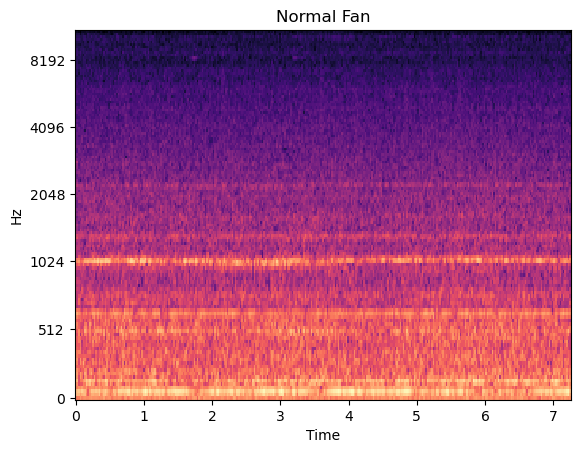

In [10]:
# plotting a single audio signal sample
librosa.display.specshow(
    np.load('./Preprocessed Dataset/fan/id_00/normal/00000101.npy'),
    x_axis="time",
    y_axis="mel",
)
plt.title('Normal Fan')
plt.show()

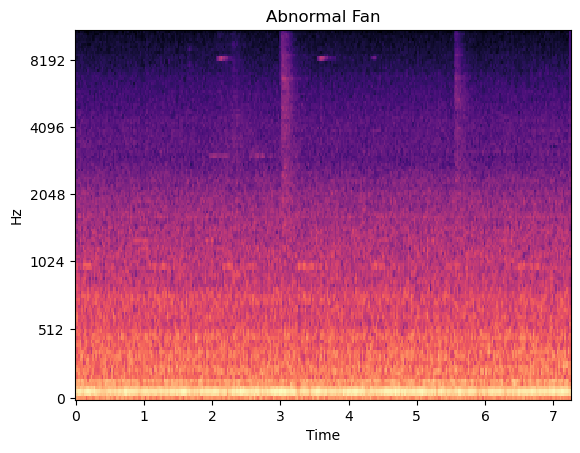

In [11]:
# plotting a single audio signal sample
librosa.display.specshow(
    np.load('./Preprocessed Dataset/fan/id_00/abnormal/00000077.npy'),
    x_axis="time",
    y_axis="mel",
)
plt.title("Abnormal Fan")
plt.show()